# Pipeline completo de exploración y limpieza

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer

### Dataset

El objetivo principal de este dataset es entender los patrones de comportamiento de las reservas. Esto incluye analizar por qué algunas reservas son canceladas, cuál es la temporada alta y baja, de qué países provienen los huéspedes, y cómo la duración de la estancia o el tipo de habitación influyen en los ingresos.

El dataset es ideal para problemas de:

- Clasificación: Predecir si una reserva será cancelada o no.

- Análisis Exploratorio: Descubrir tendencias y patrones en las reservas.

In [2]:
# ============================================================
# 1️⃣ CARGA E INSPECCIÓN INICIAL DEL DATASET
# ============================================================

# En esta primera celda revisamos la estructura del dataset:
# - Cuántas filas y columnas tiene
# - Tipos de variables
# - Posibles valores nulos o duplicados
# Este paso permite entender la "forma bruta" de los datos antes de analizarlos.



# Cargar dataset (puede descargarse desde Kaggle o carpeta local)
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv"
df = pd.read_csv(url)

print("--- Información del dataset ---")
df.info()



--- Información del dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-nul

In [3]:
print("\n--- Primeras filas ---")
display(df.head())

print(f"\nNúmero de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")




--- Primeras filas ---


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03



Número de filas: 119390
Número de columnas: 32


### Descripción de las Variables

El dataset tiene 32 variables, que se dividen en varias categorías:

- Identificación y Tipo de Hotel:

    - hotel: El tipo de hotel (City Hotel o Resort Hotel).

    - is_canceled: Indica si la reserva fue cancelada (1) o no (0).

- Información de la Reserva:

    - lead_time: Número de días entre la fecha de la reserva y la fecha de llegada.

    - arrival_date_year: Año de la fecha de llegada.

    - arrival_date_month: Mes de la fecha de llegada.

    - stays_in_weekend_nights: Noches de fin de semana reservadas.

    - stays_in_week_nights: Noches de entre semana reservadas.

- Información del Huésped:

    - adults: Número de adultos.

    - children: Número de niños.

    - babies: Número de bebés.

    - country: País de origen del huésped (código de país).

- Información del Precio y la Habitación:

    - meal: Tipo de comida reservada (BB = desayuno y cama, FB = pensión completa, HB = media pensión, etc.).

    - assigned_room_type: Tipo de habitación asignada al huésped.

    - adr (Average Daily Rate): Tarifa media diaria.

- Información del Mercado:

    - market_segment: Segmento de mercado (por ejemplo, Online TA para agencias de viajes en línea).

    - distribution_channel: Canal de distribución a través del cual se hizo la reserva.

    - is_repeated_guest: Indica si el huésped ya había estado en el hotel.

- Solicitudes y Depósitos:

    - customer_type: Tipo de cliente (por ejemplo, Transient para clientes de paso, Group, etc.).

    - required_car_parking_spaces: Número de plazas de parking solicitadas.

    - total_of_special_requests: Número de peticiones especiales del huésped.

En este primer paso analizamos la estructura del dataset.
Observamos cuántas filas y columnas tiene, los tipos de datos (numéricos, categóricos, fechas) y si existen valores nulos o duplicados.

Este análisis inicial permite entender la complejidad del dataset. Por ejemplo, los tipos object suelen requerir transformación (categorización o codificación), y los valores float pueden contener nulos que habrá que imputar.

In [4]:
print(f"\nDuplicados encontrados: {df.duplicated().sum()}")


Duplicados encontrados: 31994


**Duplicados:** debemos valorar si se trata de errores de carga o reservas repetidas legítimas.

,Valores Nulos,% del total
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
hotel,0,0.000000
is_canceled,0,0.000000
stays_in_weekend_nights,0,0.000000
arrival_date_day_of_month,0,0.000000


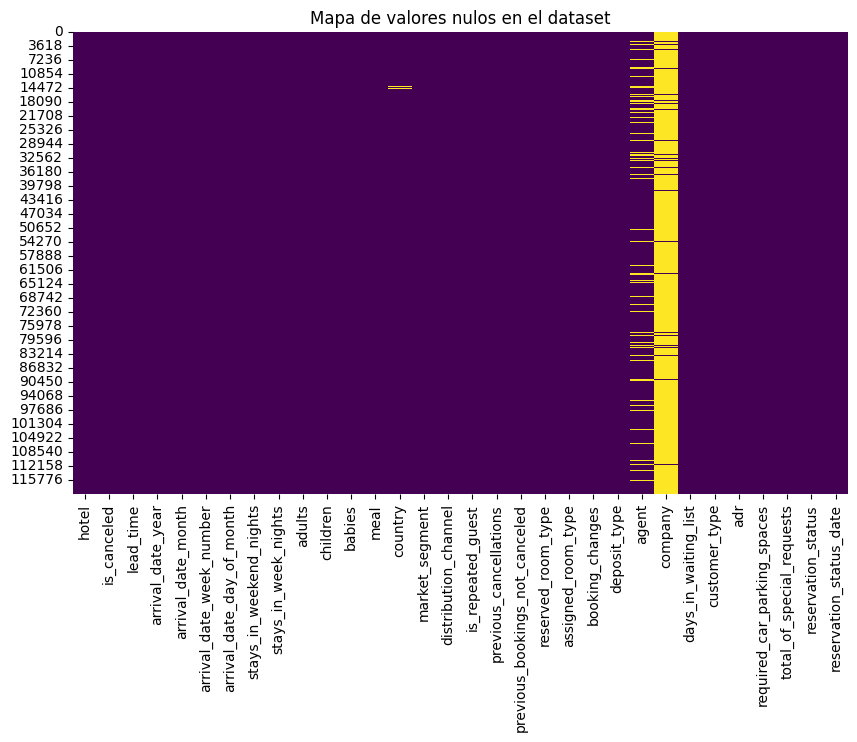

In [5]:
# ============================================================
# 2️⃣ ANÁLISIS DE VALORES NULOS
# ============================================================

# Aquí identificamos qué variables contienen valores faltantes.
# Luego mostramos un heatmap para visualizar la magnitud del problema.
# Esto ayuda a decidir si imputar o eliminar variables.

missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_data = pd.DataFrame({"Valores Nulos": missing, "% del total": missing_percent})
display(missing_data.head(10))

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de valores nulos en el dataset")
plt.show()

En el mapa de calor (heatmap) podemos ver visualmente en qué columnas se concentran los valores faltantes.

Las zonas amarillas o claras indican ausencia de valores nulos, mientras que las zonas oscuras reflejan ausencia de datos.

Este paso nos permite detectar patrones de ausencia: si hay columnas completas sin datos o si ciertas variables tienen pocos registros.

- En datos reales es habitual encontrar valores nulos, especialmente en campos opcionales (como país o tipo de comida).
- Aprender a decidir entre eliminar, imputar o mantener dependiendo del contexto y del volumen de datos perdidos.


--- Estadísticas descriptivas ---


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


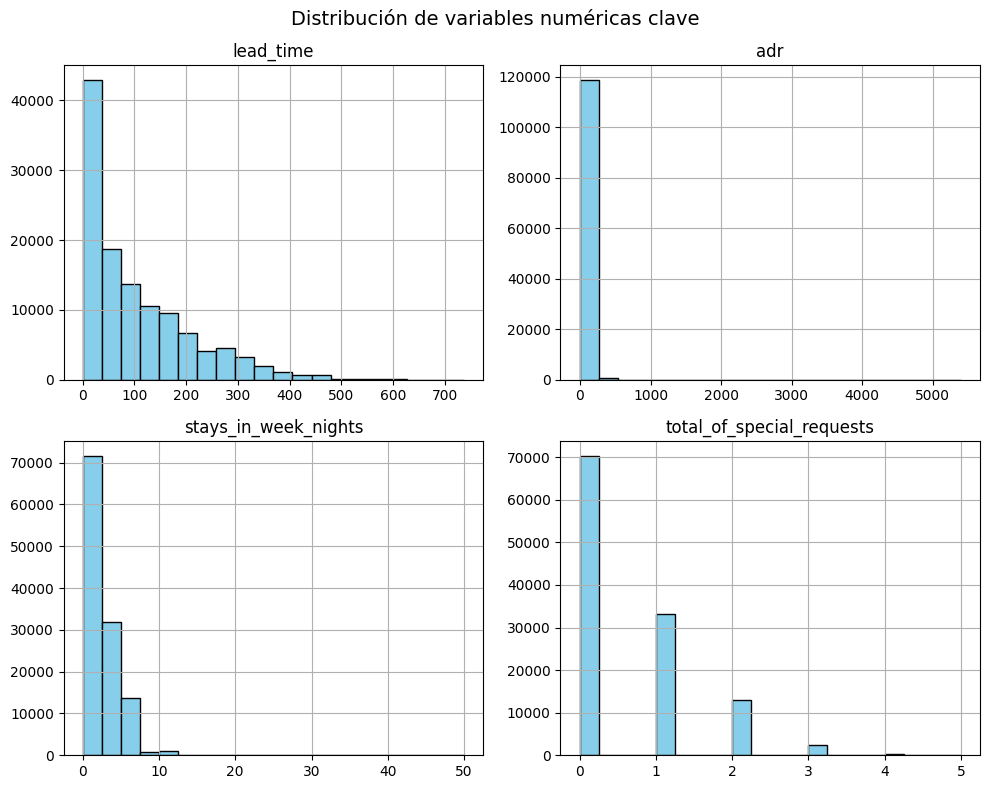

In [6]:
# ============================================================
# 3️⃣ ESTADÍSTICOS DESCRIPTIVOS
# ============================================================

# Analizamos la distribución de las variables numéricas
# y observamos posibles valores extremos o sesgos.
# También podemos detectar escalas muy diferentes entre variables.

print("\n--- Estadísticas descriptivas ---")
display(df.describe())

# Histograma de variables relevantes
num_features = ['lead_time', 'adr', 'stays_in_week_nights', 'total_of_special_requests']
df[num_features].hist(figsize=(10,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de variables numéricas clave', fontsize=14)
plt.tight_layout()
plt.show()


El resumen estadístico (describe()) muestra medidas como la media, desviación estándar, mínimo y máximo para cada variable numérica.

- La diferencia entre media y mediana puede indicar sesgo en la distribución.

- Una desviación estándar muy alta sugiere gran variabilidad o presencia de outliers.

- Los histogramas muestran visualmente estas distribuciones.

    - lead_time presenta una distribución asimétrica con muchos valores bajos y pocos muy altos. (Esto sugiere aplicar transformaciones logarítmicas más adelante.)

/tmp/ipykernel_28823/1701096191.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='adr', data=df, palette='Set2')


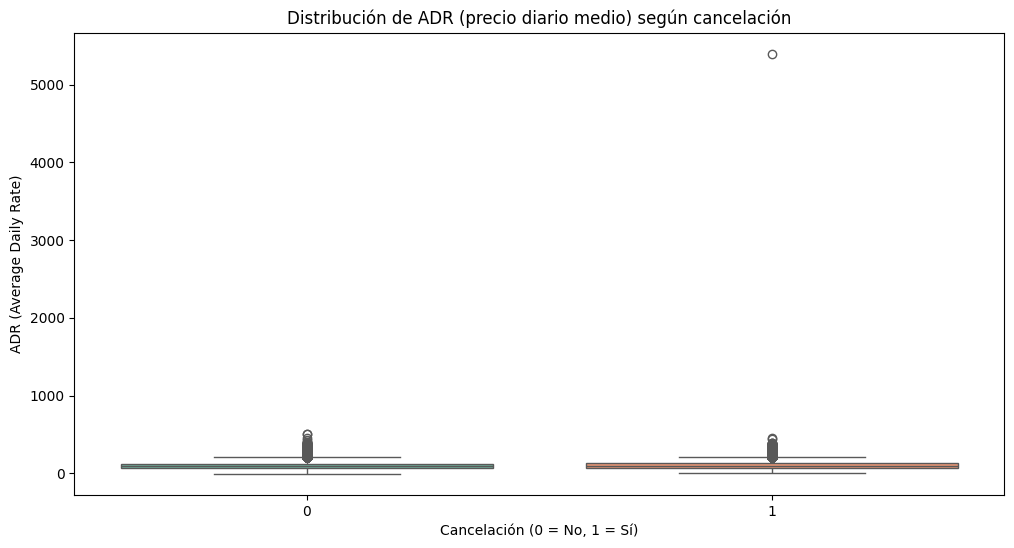

/tmp/ipykernel_28823/1701096191.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hotel', y='lead_time', data=df, palette='pastel')


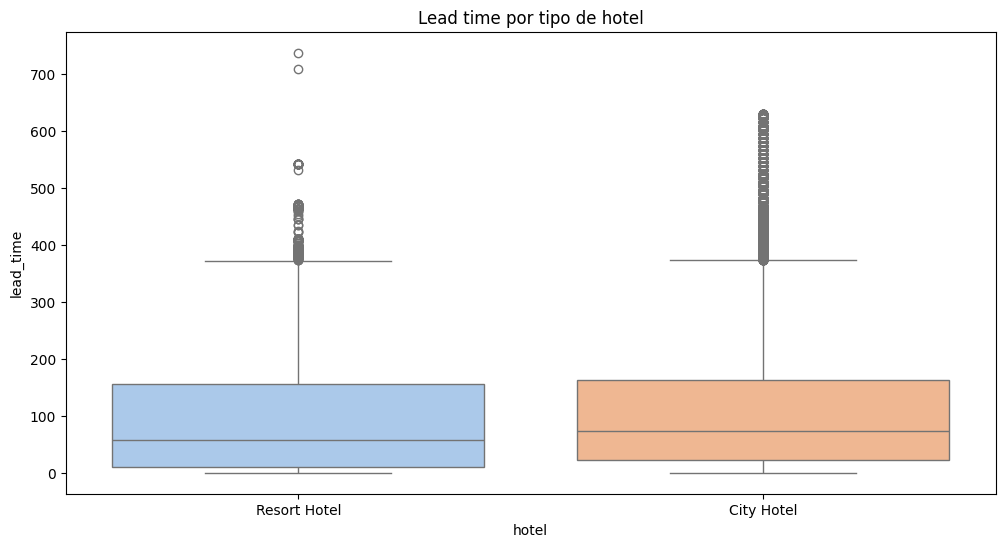

In [7]:
# ============================================================
# 4️⃣ DETECCIÓN DE OUTLIERS (Boxplots)
# ============================================================

# Los boxplots permiten ver la dispersión y detectar valores atípicos.
# Outliers extremos pueden afectar algoritmos basados en distancia o media, como K-Means.

plt.figure(figsize=(12,6))
sns.boxplot(x='is_canceled', y='adr', data=df, palette='Set2')
plt.title("Distribución de ADR (precio diario medio) según cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("ADR (Average Daily Rate)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='hotel', y='lead_time', data=df, palette='pastel')
plt.title("Lead time por tipo de hotel")
plt.show()


Los boxplots permiten visualizar valores atípicos (outliers).
Cada punto fuera del bigote superior o inferior representa una observación que se aleja significativamente del resto.

En el gráfico de ADR por cancelación, los valores muy altos indican precios anómalos o posibles errores de registro.

- Los outliers pueden tener distintas causas:

    - Errores de medición o introducción.

    - Reservas excepcionales o promociones.

En el análisis real, no siempre se eliminan. Lo importante es comprender su origen y decidir con criterio si afectan al modelo.

In [8]:
# ============================================================
# 5️⃣ CONVERSIÓN DE TIPOS Y VARIABLES TEMPORALES
# ============================================================

# Convertimos columnas de fecha a formato datetime
# y generamos variables derivadas útiles para el análisis.

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

print("--- Columnas temporales añadidas ---")
print(df[['reservation_status_date', 'year', 'month', 'day']].head())


--- Columnas temporales añadidas ---
  reservation_status_date  year  month  day
0              2015-07-01  2015      7    1
1              2015-07-01  2015      7    1
2              2015-07-02  2015      7    2
3              2015-07-02  2015      7    2
4              2015-07-03  2015      7    3


En esta sección transformamos la variable de fecha (reservation_status_date) al tipo datetime, lo que nos permite extraer nuevas características temporales: año, mes y día.

Este paso es crucial para series temporales o análisis estacionales.
Por ejemplo, podemos analizar la estacionalidad de reservas (mayor demanda en verano o navidad) o el comportamiento del cliente según el mes.

También sirve para crear nuevas variables predictoras útiles en modelos posteriores.

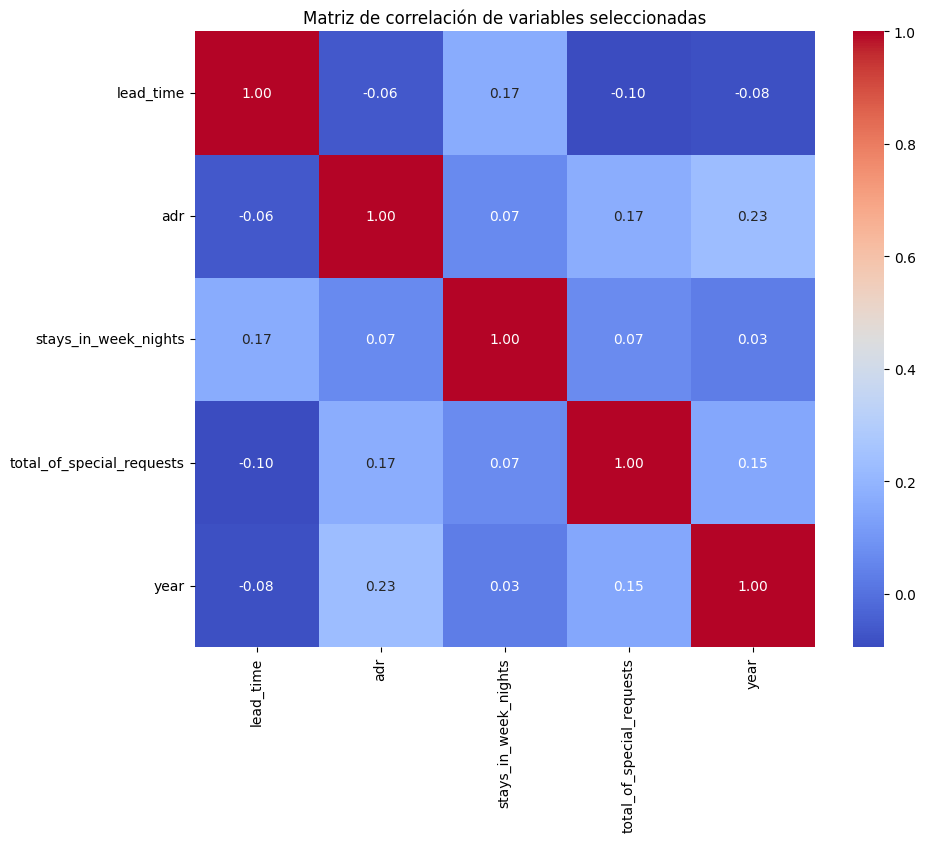

In [9]:
# ============================================================
# 6️⃣ ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
# ============================================================

# Medir correlaciones permite identificar redundancias o relaciones interesantes
# entre las variables, lo cual orienta decisiones de reducción de dimensionalidad.

corr = df[num_features + ['year']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de variables seleccionadas")
plt.show()


El mapa de calor de correlaciones muestra la relación lineal entre las variables numéricas.

Una correlación positiva alta (cercana a 1) indica que ambas variables crecen juntas.

Una correlación negativa (cercana a -1) indica que una variable disminuye cuando la otra aumenta.

Este análisis ayuda a detectar redundancia de variables, lo cual es importante antes de aplicar PCA o clustering.
Si dos variables están muy correladas, una de ellas podría eliminarse sin perder información significativa.

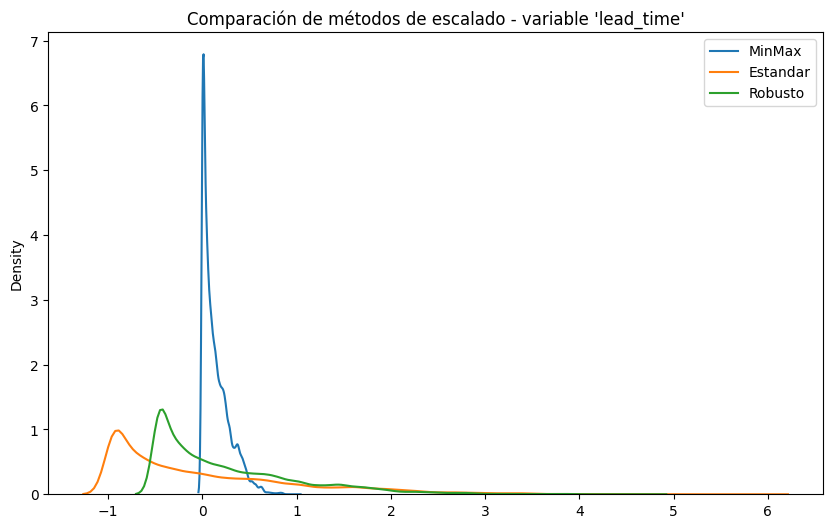

In [10]:
# ============================================================
# 7️⃣ ESCALADO Y NORMALIZACIÓN
# ============================================================

# Algunos algoritmos (como PCA o K-Means) requieren variables en la misma escala.
# Aquí comparamos tres métodos: MinMaxScaler, StandardScaler y RobustScaler.

scalers = {
    "MinMax": MinMaxScaler(),
    "Estandar": StandardScaler(),
    "Robusto": RobustScaler()
}

feature = 'lead_time'
plt.figure(figsize=(10,6))

for i, (name, scaler) in enumerate(scalers.items(), 1):
    scaled = scaler.fit_transform(df[[feature]])
    sns.kdeplot(scaled.flatten(), label=name)

plt.title("Comparación de métodos de escalado - variable 'lead_time'")
plt.legend()
plt.show()


Aquí comparamos tres técnicas de escalado:

- MinMaxScaler: comprime los datos a un rango [0,1].
- StandardScaler: centra los datos (media 0, varianza 1).
- RobustScaler: usa mediana e IQR, resistente a outliers.

El escalado no cambia la forma de los datos, pero sí su escala, y que algoritmos como K-Means o PCA son extremadamente sensibles a la escala.

### **KDE Plot**:
- Observamos cómo cambia la forma de la distribución de la variable lead_time: utiliza una línea continua para mostrar la distribución de tus datos. La altura de la línea en cualquier punto del eje X indica qué tan densos o frecuentes son los datos en ese valor.

**Interpretación del gráfico**
- Línea Azul (MinMax): Representa los datos escalados con MinMaxScaler. Este método comprime todos los valores al rango entre 0 y 1. Como puedes ver, la distribución de la línea azul se concentra completamente entre estos dos valores.

- Línea Naranja (Estandar): Representa los datos escalados con StandardScaler. Este método centra la media de los datos en 0 y la escala para que la desviación estándar sea 1. Por eso, la línea naranja se centra alrededor del cero en el eje X.

- Línea Verde (Robusto): Representa los datos escalados con RobustScaler. La línea verde también se centra cerca del 0, pero la forma de su distribución puede ser diferente a la del StandardScaler si la variable original tenía muchos valores atípicos.



### **Outliers**
Se debe elegir el escalado adecuado depende del contexto y la presencia de outliers.
- **MinMaxScaler:** Calcula su rango basándose en los valores mínimos y máximos. Un solo outlier muy grande puede expandir el rango de forma desproporcionada, lo que comprime el resto de los datos en un pequeño espacio, perdiendo su variación relativa.

- **StandardScaler:** Usa la media y la desviación estándar. Ambos valores son muy sensibles a los outliers. Un solo valor extremo puede "tirar" de la media hacia él y aumentar drásticamente la desviación estándar, lo que resulta en una escala que no representa bien la distribución central de tus datos.

- **RobustScaler:** Fue diseñado específicamente para ser resistente a los outliers. En lugar de usar la media y la desviación estándar, utiliza la mediana y el rango intercuartílico (IQR).

    - La mediana es el valor central de tus datos y no se ve afectada por valores extremos.

    - El IQR es la diferencia entre el percentil 75 y el 25, ignorando por completo los outliers en los extremos.

/home/jrabal/Documentos/venv_ML/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


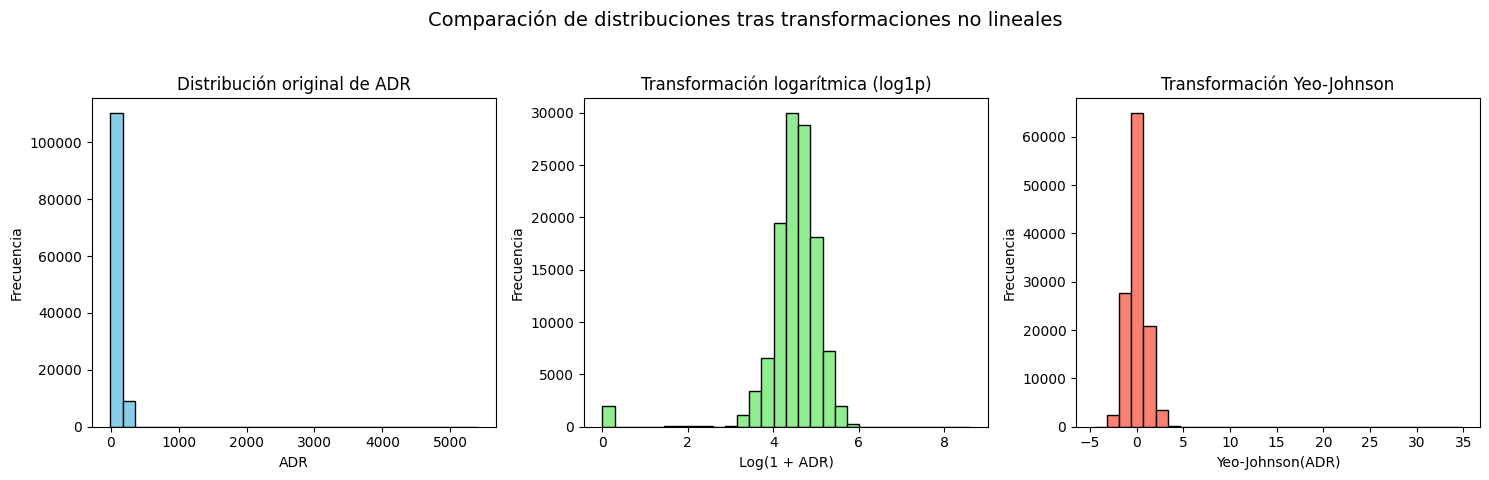

In [11]:
# ============================================================
# 8️⃣ TRANSFORMACIONES NO LINEALES (Versión didáctica con histogramas)
# ============================================================

# Cuando las variables presentan asimetría (sesgo), podemos aplicar transformaciones
# logarítmicas o de potencia para estabilizar la varianza y aproximar una distribución normal.

from sklearn.preprocessing import PowerTransformer

# Creamos un nuevo DataFrame con las transformaciones
df_trans = df[['adr']].copy()
df_trans['log_adr'] = np.log1p(df_trans['adr'])  # log(1+x) evita problemas con ceros
df_trans['yeojohnson_adr'] = PowerTransformer(method='yeo-johnson').fit_transform(df[['adr']])

# --- Visualización comparativa ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Histograma original
axes[0].hist(df_trans['adr'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title("Distribución original de ADR")
axes[0].set_xlabel("ADR")
axes[0].set_ylabel("Frecuencia")

# Histograma log-transformado
axes[1].hist(df_trans['log_adr'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title("Transformación logarítmica (log1p)")
axes[1].set_xlabel("Log(1 + ADR)")
axes[1].set_ylabel("Frecuencia")

# Histograma Yeo-Johnson
axes[2].hist(df_trans['yeojohnson_adr'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title("Transformación Yeo-Johnson")
axes[2].set_xlabel("Yeo-Johnson(ADR)")
axes[2].set_ylabel("Frecuencia")

plt.suptitle("Comparación de distribuciones tras transformaciones no lineales", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


En este bloque se comparan tres distribuciones de la variable ADR (precio medio diario):

- **Original:** muestra una clara asimetría, con la mayoría de valores concentrados en la zona baja y una larga cola derecha (precios altos excepcionales).

- **Transformación logarítmica (log1p):** comprime los valores extremos, reduciendo el sesgo y acercando la distribución a una forma más simétrica.

- **Transformación Yeo-Johnson:** similar al logaritmo, pero más flexible, ya que admite valores negativos o cercanos a cero.

Este tipo de transformaciones se utilizan para que los modelos de machine learning (por ejemplo, regresión lineal o PCA) no estén dominados por valores extremos y funcionen mejor bajo supuestos de normalidad.

**Conclusión:** Este tipo de comparativa ayuda a visualizar cómo una simple transformación matemática puede mejorar drásticamente la calidad de los datos.
En datasets reales (como precios, ingresos o ventas), aplicar este tipo de ajustes puede marcar la diferencia en el rendimiento de los modelos.

In [12]:
# ============================================================
# 9️⃣ CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# ============================================================

# Convertimos variables categóricas en variables numéricas mediante One-Hot Encoding.
# Esto es esencial para que los modelos puedan procesarlas correctamente.

categorical_features = ['hotel', 'meal', 'distribution_channel', 'deposit_type']
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

print("--- Ejemplo de codificación (primeras columnas) ---")
display(df_encoded.head())


--- Ejemplo de codificación (primeras columnas) ---


,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable
0,True,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,True,False,False,False


In [13]:
df_sub = df[categorical_features]
df_sub


,hotel,meal,distribution_channel,deposit_type
0,Resort Hotel,BB,Direct,No Deposit
1,Resort Hotel,BB,Direct,No Deposit
2,Resort Hotel,BB,Direct,No Deposit
3,Resort Hotel,BB,Corporate,No Deposit
4,Resort Hotel,BB,TA/TO,No Deposit
...,...,...,...,...
119385,City Hotel,BB,TA/TO,No Deposit
119386,City Hotel,BB,TA/TO,No Deposit
119387,City Hotel,BB,TA/TO,No Deposit
119388,City Hotel,BB,TA/TO,No Deposit


**One-Hot Encoding:** convierte categorías (texto) en columnas binarias, permitiendo que los modelos numéricos puedan procesarlas.
- A partir de una versión reciente de pandas, pd.get_dummies por defecto crea columnas con valores booleanos (True/False) en lugar de los enteros (0/1). Sin embargo, para los modelos de aprendizaje automático, estos valores booleanos son tratados internamente como si fueran 0 y 1. Los algoritmos pueden procesar True como 1 y False como 0 sin ningún problema.
- El número de columnas aumenta al aplicar get_dummies().
- Problemas de alta dimensionalidad si hay muchas categorías, lo que motiva técnicas como target encoding o embeddings.

In [14]:
# ============================================================
# 🔟 CONCLUSIÓN Y GUARDADO DEL DATASET LIMPIO
# ============================================================

# Eliminamos duplicados y valores nulos restantes,
# y guardamos el dataset limpio para las siguientes etapas (PCA, Clustering...).

df_clean = df.drop_duplicates().dropna()

print(f"Dataset final: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")
df_clean.to_csv("hotel_bookings_clean.csv", index=False)

print("Dataset limpio guardado correctamente.")


Dataset final: 189 filas, 35 columnas
Dataset limpio guardado correctamente.


Este bloque finaliza el proceso de depuración:

- Se eliminan duplicados.

- Se eliminan o imputan valores nulos.

- Se dejan variables tipadas y escaladas correctamente.

Un dataset limpio es la base para cualquier modelo de aprendizaje fiable.

A partir de este punto, el archivo hotel_bookings_clean.csv puede emplearse directamente para:

- Clustering (K-Means, DBSCAN)

- Reducción de dimensionalidad (PCA)

- Modelos supervisados (regresión o clasificación)